This script applies the same approach used in [Network_distribution_powerfit.ipynb](https://134.107.226.208:9998/notebooks/uBiome/Jul2016/Network_distribution_powerfit.ipynb) to a mouse dataset, from [Langille et al, Microbiome, 2014](https://microbiomejournal.biomedcentral.com/articles/10.1186/s40168-014-0050-9)

In [1]:
import numpy as np
genus = open('../data/Network_statistics_Mouse_Langille_et_al2014.txt', 'rU').read()
genusarr = np.array([i.split('\t') for i in genus.split('\n')[:-1]])

In [2]:
import matplotlib
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
from pylab import *
from scipy import *
import pylab as P


User @ Host | Kernel - Home Folder:
   DValenzano @ bioinf-blc-24 | Linux - /beegfs/group_dv/home/DValenzano 
Repositories (ID):
   http://cran.r-project.org (CRAN)
   http://ftp5.gwdg.de/pub/misc/cran (GWDG)
   http://cran.rstudio.com/ (RSTUDIO)
Libraries (Packages):
   /beegfs/group_dv/home/DValenzano/.local/lib/R/3.2 (1)
   /beegfs/group_dv/home/DValenzano/.R/3.2.4 (0)
   /beegfs/common/software/R/3.2.4/lib64/R/library (88)
   /software/R/3.2.4/lib64/R/library (88)



In [4]:
old_g = [i for i in genusarr[1:] if i[1] == 'OLD']
young_g = [i for i in genusarr[1:] if i[1] == 'YOUNG']
middle_g = [i for i in genusarr[1:] if i[1] == 'MIDDLE']

(0, 50)

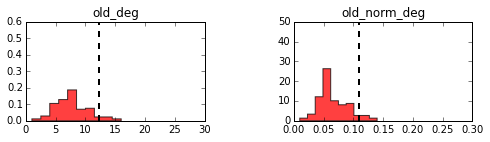

In [6]:
plt.figure(figsize=(8,1))

plt.subplot(1,2,1)

n, bins, patches = plt.hist([int(i[0]) for i in old_g], 10, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.title('old_deg')
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
#plt.axvline(np.percentile(np.array([int(i[0]) for i in wk6_g]), 90), color='k', linestyle='--', lw=2)
plt.axvline(np.percentile(np.array([int(i[0]) for i in old_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,30)
plt.ylim(0,0.6)

plt.subplot(1,2,2)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
plt.axvline(np.percentile(np.array([float(i[2]) for i in old_g]), 95), color='k', linestyle='--', lw=2)
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in old_g], 10, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.title('old_norm_deg')
plt.xlim(0,0.3)
plt.ylim(0,50)

(0, 50)

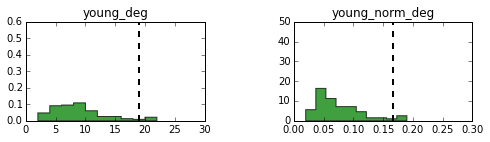

In [7]:
plt.figure(figsize=(8,1))

plt.subplot(1,2,1)

n, bins, patches = plt.hist([int(i[0]) for i in young_g], 10, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.title('young_deg')
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
#plt.axvline(np.percentile(np.array([int(i[0]) for i in wk6_g]), 90), color='k', linestyle='--', lw=2)
plt.axvline(np.percentile(np.array([int(i[0]) for i in young_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,30)
plt.ylim(0,0.6)

plt.subplot(1,2,2)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
plt.axvline(np.percentile(np.array([float(i[2]) for i in young_g]), 95), color='k', linestyle='--', lw=2)
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in young_g], 10, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.title('young_norm_deg')
plt.xlim(0,0.3)
plt.ylim(0,50)

(0, 50)

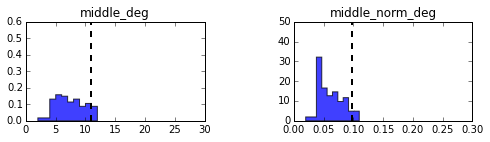

In [8]:
plt.figure(figsize=(8,1))

plt.subplot(1,2,1)

n, bins, patches = plt.hist([int(i[0]) for i in middle_g], 10, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.title('middle_deg')
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
#plt.axvline(np.percentile(np.array([int(i[0]) for i in wk6_g]), 90), color='k', linestyle='--', lw=2)
plt.axvline(np.percentile(np.array([int(i[0]) for i in middle_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,30)
plt.ylim(0,0.6)

plt.subplot(1,2,2)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
plt.axvline(np.percentile(np.array([float(i[2]) for i in middle_g]), 95), color='k', linestyle='--', lw=2)
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in middle_g], 10, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.title('middle_norm_deg')
plt.xlim(0,0.3)
plt.ylim(0,50)

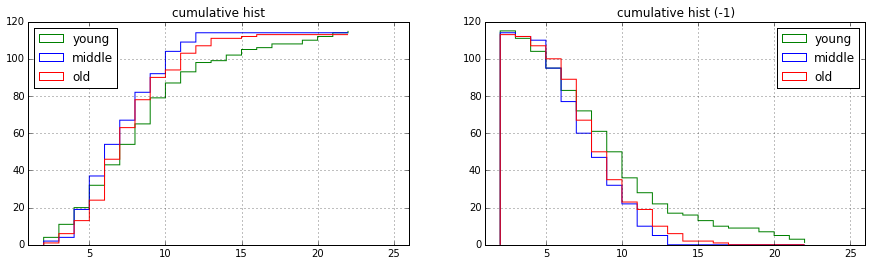

In [9]:
bins = sorted([int(i[0]) for i in young_g]) + [np.inf]

plt.figure(figsize=(15,4))

plt.subplot(1,2,2)

plt.xlim(1,26)
n, bins, patches = plt.hist([int(i[0]) for i in young_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='young', color='g') 
n, bins, patches = plt.hist([int(i[0]) for i in middle_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='middle', color='b') 
n, bins, patches = plt.hist([int(i[0]) for i in old_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='old', color='r') 
plt.title('cumulative hist (-1)')
# pylab.plot(x, y1, '-b', label='sine')
# pylab.plot(x, y2, '-r', label='cosine')
P.legend(loc='upper right')

P.grid(True)

plt.subplot(1,2,1)
plt.xlim(1,26)
n, bins, patches = plt.hist([int(i[0]) for i in young_g], normed=False, bins=bins, histtype='step', cumulative=True, label='young', color='g') 
n, bins, patches = plt.hist([int(i[0]) for i in middle_g], normed=False, bins=bins, histtype='step', cumulative=True, label='middle', color='b') 
n, bins, patches = plt.hist([int(i[0]) for i in old_g], normed=False, bins=bins, histtype='step', cumulative=True, label='old', color='r') 
plt.title('cumulative hist')
P.legend(loc='upper left')

P.grid(True)

Below, same analsys, performed for normalized distributions. 

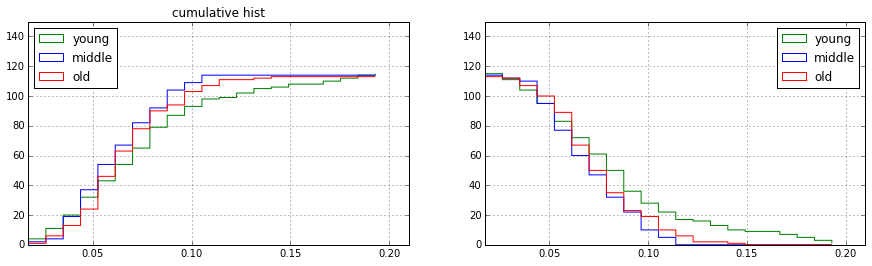

In [34]:
bins = sorted([float(i[2]) for i in young_g]) + [np.inf]

plt.figure(figsize=(15,4))

plt.subplot(1,2,2)
plt.xlim(0.0175,0.21)
plt.ylim(0,150)
n, bins, patches = plt.hist([float(i[2]) for i in young_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='young', color='g') 
n, bins, patches = plt.hist([float(i[2]) for i in middle_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='middle', color='b') 
n, bins, patches = plt.hist([float(i[2]) for i in old_g], normed=False, bins=bins, histtype='step', cumulative=-1, label='old', color='r') 
# pylab.plot(x, y1, '-b', label='sine')
# pylab.plot(x, y2, '-r', label='cosine')
P.legend(loc='upper right')

P.grid(True)

plt.subplot(1,2,1)
plt.xlim(0.0175,0.21)
plt.ylim(0,150)
n, bins, patches = plt.hist([float(i[2]) for i in young_g], normed=False, bins=bins, histtype='step', cumulative=True, label='young', color='g') 
n, bins, patches = plt.hist([float(i[2]) for i in middle_g], normed=False, bins=bins, histtype='step', cumulative=True, label='middle', color='b') 
n, bins, patches = plt.hist([float(i[2]) for i in old_g], normed=False, bins=bins, histtype='step', cumulative=True, label='old', color='r') 
plt.title('cumulative hist')
P.legend(loc='upper left')

P.grid(True)
savefig('Mouse_cum_hist_norm.pdf')

The two analysis above gave exactly the same plots, indicating that these netwrorks are scale-free!

In [16]:
perc_young = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in young_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in young_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_middle = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in middle_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in middle_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_old = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in old_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in old_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)

young_a = np.array([int(i.split(' ')[-1]) for i in perc_young])
middle_a = np.array([int(i.split(' ')[-1]) for i in perc_middle])
old_a = np.array([int(i.split(' ')[-1]) for i in perc_old])

data = [young_a, middle_a, old_a]

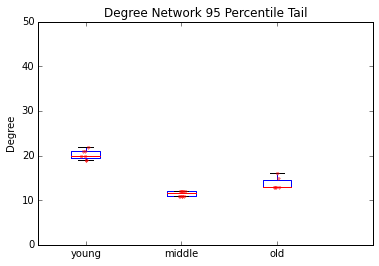

In [18]:
plt.boxplot(data) # Or you can use the boxplot from Pandas
plt.ylim(0,50)
plt.title('Degree Network 95 Percentile Tail')

plt.xticks([1, 2, 3, 4], ['young', 'middle', 'old'])
plt.ylabel('Degree')

for i in [1,2,3]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.5)

In [19]:
from sets import Set

young_key = [i.split(':')[0] for i in perc_young]
young_value = [i.split(':')[1][1:] for i in perc_young]
young_d = dict(zip(young_key, young_value))

middle_key = [i.split(':')[0] for i in perc_middle]
middle_value = [i.split(':')[1][1:] for i in perc_middle]
middle_d = dict(zip(middle_key, middle_value))

old_key = [i.split(':')[0] for i in perc_old]
old_value = [i.split(':')[1][1:] for i in perc_old]
old_d = dict(zip(old_key, old_value))

/beegfs/group_dv/home/DValenzano/.Python/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


In [20]:
# list of phyla for each group
young_key_ph = list(Set([i.split(',')[0] for i in young_key]))
middle_key_ph = list(Set([i.split(',')[0] for i in middle_key]))
old_key_ph = list(Set([i.split(',')[0] for i in old_key]))

In [21]:
# First, values for the overall network
lp_young = []
for j in young_key_ph:
    ls = [j]
    for i in young_key:
        if j in i:
            ls.append(int(young_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_young.append(lz)
    
lp_middle = []
for j in middle_key_ph:
    ls = [j]
    for i in middle_key:
        if j in i:
            ls.append(int(middle_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_middle.append(lz)
    
lp_old = []
for j in old_key_ph:
    ls = [j]
    for i in old_key:
        if j in i:
            ls.append(int(old_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_old.append(lz)

In [22]:
# list of phyla for each group
young_key_ph = list(Set([i.split(',')[0] for i in young_key]))
middle_key_ph = list(Set([i.split(',')[0] for i in middle_key]))
old_key_ph = list(Set([i.split(',')[0] for i in old_key]))

In [23]:
# First, values for the overall network
lp_young = []
for j in young_key_ph:
    ls = [j]
    for i in young_key:
        if j in i:
            ls.append(int(young_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_young.append(lz)
    
lp_middle = []
for j in middle_key_ph:
    ls = [j]
    for i in middle_key:
        if j in i:
            ls.append(int(middle_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_middle.append(lz)
    
lp_old = []
for j in old_key_ph:
    ls = [j]
    for i in old_key:
        if j in i:
            ls.append(int(old_d[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_old.append(lz)

In [82]:
perc = 90

perc_young = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in young_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in young_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_middle = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in middle_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in middle_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_old = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in old_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in old_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 

young_a = np.array([int(i.split(' ')[-1]) for i in perc_young])
middle_a = np.array([int(i.split(' ')[-1]) for i in perc_middle])
old_a = np.array([int(i.split(' ')[-1]) for i in perc_old])

##

young_key90 = [i.split(':')[0] for i in perc_young]
young_value90 = [i.split(':')[1][1:] for i in perc_young]
young_d90 = dict(zip(young_key90, young_value90))

middle_key90 = [i.split(':')[0] for i in perc_middle]
middle_value90 = [i.split(':')[1][1:] for i in perc_middle]
middle_d90 = dict(zip(middle_key90, middle_value90))

old_key90 = [i.split(':')[0] for i in perc_old]
old_value90 = [i.split(':')[1][1:] for i in perc_old]
old_d90 = dict(zip(old_key90, old_value90))


# list of phyla for each group
young_key90_ph = list(Set([i.split(',')[0] for i in young_key90]))
middle_key90_ph = list(Set([i.split(',')[0] for i in middle_key90]))
old_key90_ph = list(Set([i.split(',')[0] for i in old_key90]))

# Now, the values for the 90 percentile degree network
lp_young_90 = []
for j in young_key90_ph:
    ls = [j]
    for i in young_key90:
        if j in i:
            ls.append(int(young_d90[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_young_90.append(lz)
    
lp_middle_90 = []
for j in middle_key90_ph:
    ls = [j]
    for i in middle_key90:
        if j in i:
            ls.append(int(middle_d90[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_middle_90.append(lz)
    
lp_old_90 = []
for j in old_key90_ph:
    ls = [j]
    for i in old_key90:
        if j in i:
            ls.append(int(old_d90[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_old_90.append(lz)
    
phyla_90 = list(Set([i.split(',')[0] for i in lp_young_90]+[i.split(',')[0] for i in lp_middle_90]+[i.split(',')[0] for i in lp_old_90]))    

class dct(object):
    def __init__(self, inp): 
        self.inp = inp
        self.k = [ i.split(',')[0] for i in self.inp ] 
        self.v = [ i.split(',')[1] for i in self.inp ] 
        self.d = dict(zip(self.k, self.v))

lp_young_c = dct(lp_young_90)
lp_middle_c = dct(lp_middle_90)
lp_old_c = dct(lp_old_90)
       
lp_young_cab = [ int(lp_young_c.d[i]) if i in lp_young_c.k  else int('0')  for i in phyla_90]
lp_middle_cab = [ int(lp_middle_c.d[i]) if i in lp_middle_c.k  else int('0')  for i in phyla_90]
lp_old_cab = [ int(lp_old_c.d[i]) if i in lp_old_c.k  else int('0')  for i in phyla_90]

raw_data_90 = {'phyla_90': phyla_90, 
           'young_90':lp_young_cab, 
           'middle_90':lp_middle_cab, 
           'old_90':lp_old_cab}

df_90 = pd.DataFrame(raw_data_90, columns = ['phyla_90', 'young_90', 'middle_90', 'old_90'])
df_90

,phyla_90,young_90,middle_90,old_90
0,Verrucomicrobia,0,11,0
1,Firmicutes,179,130,172
2,Bacteroidetes,15,21,35
3,Actinobacteria,0,32,0
4,Deferribacteres,21,10,0
5,Proteobacteria,22,31,23


In [83]:
# Create a list of colors (from iWantHue)
colors = ["darksalmon", "#469649", "#ffa500", "#ffd700", "darkviolet", "#f62222"]
#colors = ["#ffd700", "#ffa500", "#00FFFF", "#469649", "#f62222"]
#'Act', 'Bact', 'Cyan', 'Firm', 'Prot'

In [84]:
import pandas as pd

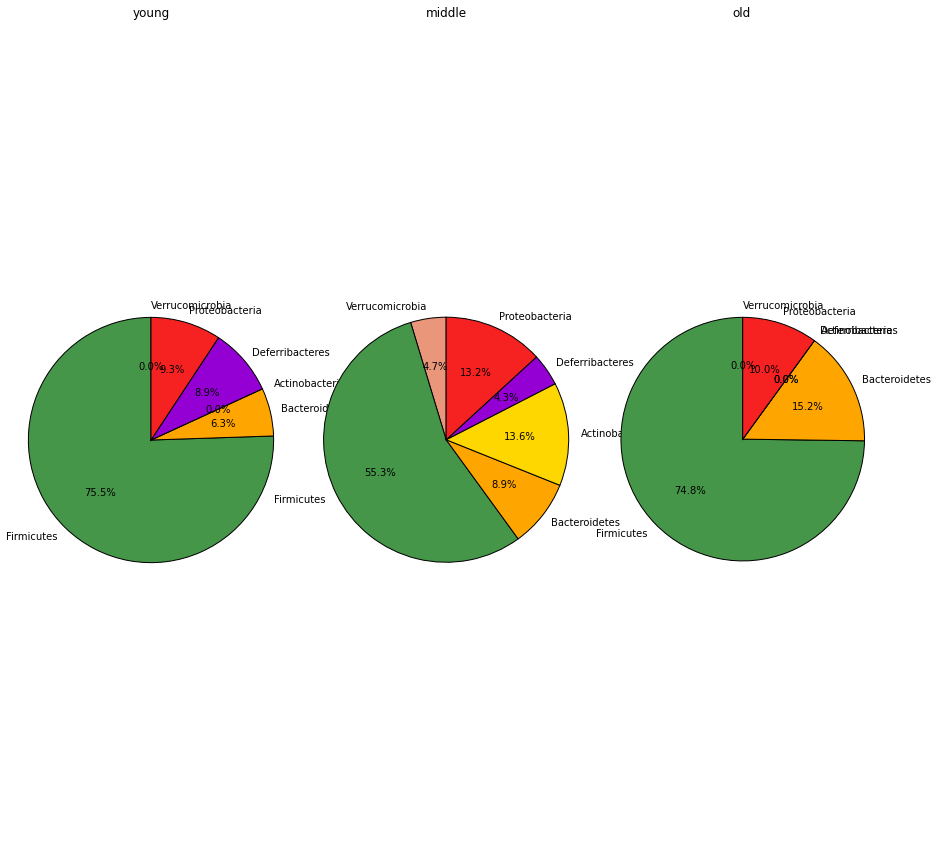

In [92]:
plt.figure(figsize=(15,15))

########

plt.subplot(1,3,1)
plt.pie(
    # using data total)arrests
    df_90['young_90'],
    # with the labels being officer names
    labels=df_90['phyla_90'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('young')

########

plt.subplot(1,3,2)
plt.pie(
    # using data total)arrests
    df_90['middle_90'],
    # with the labels being officer names
    labels=df_90['phyla_90'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('middle')

########

plt.subplot(1,3,3)
plt.pie(
    # using data total)arrests
    df_90['old_90'],
    # with the labels being officer names
    labels=df_90['phyla_90'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('old')

########

plt.show()

savefig('piecharts_90th_degree_percentile.pdf')

**Figure caption:**  
Relative abundance of bacterial phyla in young, middle age and old mice guts. These measures refer to the 90th percentile more conncted bacteria.

In [86]:
# With no 90 percent cutoff:

perc = 0

perc_young = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in young_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in young_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_middle = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in middle_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in middle_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_old = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in old_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in old_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 

young_a = np.array([int(i.split(' ')[-1]) for i in perc_young])
middle_a = np.array([int(i.split(' ')[-1]) for i in perc_middle])
old_a = np.array([int(i.split(' ')[-1]) for i in perc_old])

##

young_key0 = [i.split(':')[0] for i in perc_young]
young_value0 = [i.split(':')[1][1:] for i in perc_young]
young_d0 = dict(zip(young_key0, young_value0))

middle_key0 = [i.split(':')[0] for i in perc_middle]
middle_value0 = [i.split(':')[1][1:] for i in perc_middle]
middle_d0 = dict(zip(middle_key0, middle_value0))

old_key0 = [i.split(':')[0] for i in perc_old]
old_value0 = [i.split(':')[1][1:] for i in perc_old]
old_d0 = dict(zip(old_key0, old_value0))


# list of phyla for each group
young_key0_ph = list(Set([i.split(',')[0] for i in young_key0]))
middle_key0_ph = list(Set([i.split(',')[0] for i in middle_key0]))
old_key0_ph = list(Set([i.split(',')[0] for i in old_key0]))

# Now, the values for the 0 percentile degree network
lp_young_0 = []
for j in young_key0_ph:
    ls = [j]
    for i in young_key0:
        if j in i:
            ls.append(int(young_d0[i]))
        lz = j+','+str(sum(ls[1:]))
    lp_young_0.append(lz)
     
phyla = list(Set([i.split(',')[0] for i in lp_young]+[i.split(',')[0] for i in lp_middle]+[i.split(',')[0] for i in lp_old]))    

class dct(object):
    def __init__(self, inp): 
        self.inp = inp
        self.k = [ i.split(',')[0] for i in self.inp ] 
        self.v = [ i.split(',')[1] for i in self.inp ] 
        self.d = dict(zip(self.k, self.v))

lp_young_c = dct(lp_young)
lp_middle_c = dct(lp_middle)
lp_old_c = dct(lp_old)
       
lp_young_cab = [ int(lp_young_c.d[i]) if i in lp_young_c.k  else int('0')  for i in phyla]
lp_middle_cab = [ int(lp_middle_c.d[i]) if i in lp_middle_c.k  else int('0')  for i in phyla]
lp_old_cab = [ int(lp_old_c.d[i]) if i in lp_old_c.k  else int('0')  for i in phyla]

raw_data = {'phyla_0': phyla, 
           'young_0':lp_young_cab, 
           'middle_0':lp_middle_cab, 
           'old_0':lp_old_cab}

df = pd.DataFrame(raw_data, columns = ['phyla_0', 'young_0', 'middle_0', 'old_0'])
df

,phyla_0,young_0,middle_0,old_0
0,Verrucomicrobia,0,11,0
1,Firmicutes,99,70,70
2,Bacteroidetes,0,11,13
3,Actinobacteria,0,12,0
4,Deferribacteres,21,0,0
5,Proteobacteria,22,11,0


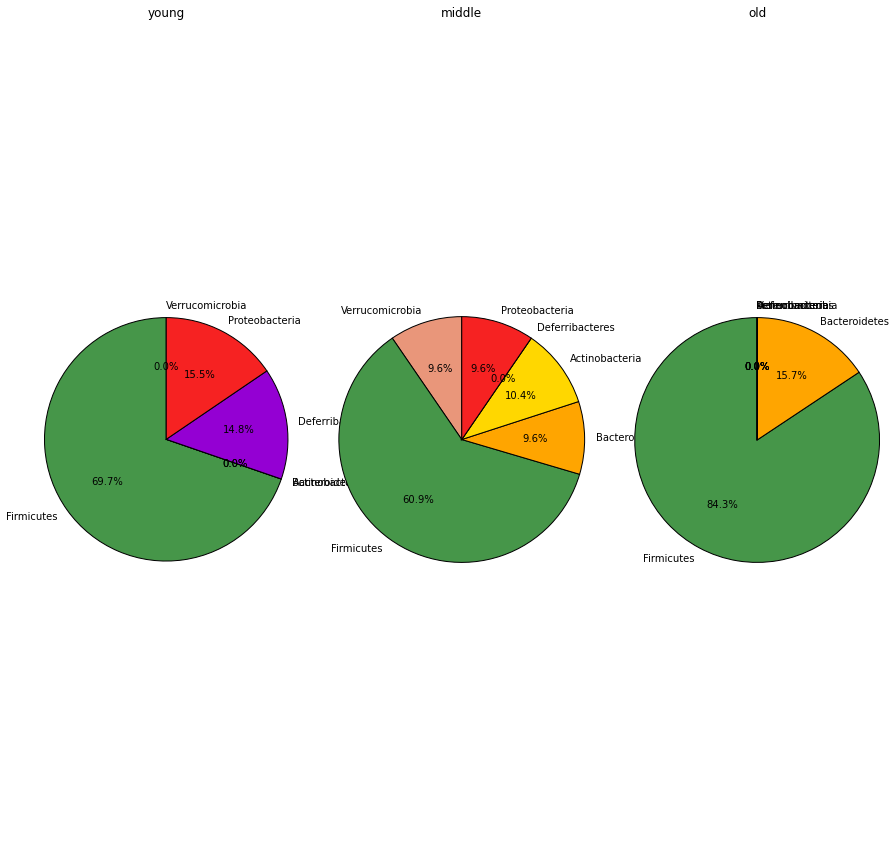

In [87]:
plt.figure(figsize=(15,15))

########

plt.subplot(1,3,1)
plt.pie(
    # using data total)arrests
    df['young_0'],
    # with the labels being officer names
    labels=df['phyla_0'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('young')

########

plt.subplot(1,3,2)
plt.pie(
    # using data total)arrests
    df['middle_0'],
    # with the labels being officer names
    labels=df['phyla_0'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('middle')

########

plt.subplot(1,3,3)
plt.pie(
    # using data total)arrests
    df['old_0'],
    # with the labels being officer names
    labels=df['phyla_0'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
#    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
# View the plot
#plt.tight_layout()
plt.title('old')

########

plt.show()

savefig('MOUSE_piecharts.pdf')

**Figure caption:**  
Relative abundance of bacterial phyla in young, middle age and old mice guts. These measures refer to the 0th percentile more conncted bacteria, so it's the overall abundance in the dataset used for the network analysis. Firmicutes are more abundant in the 90th percentile in young fish, but not in old, where the reverse it's true, i.e. Firmicutes become less abundant in with age. Proteobacteria, just like in fish, become less abundant among the hubs (i.e. the 90th percentile) in young fish, but become more abundant in old fish. 